In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Question 1 ---------------------- 

In [27]:
#----------- Step 3 -------------
# Assign it to a variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [28]:
#----------- Step 4 -------------
# Discover what is the mean age per occupation
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [29]:
#----------- Step 5 -------------
# Discover the Male ratio per occupation and sort it from the most to the least
occupation_wise_count = users['occupation'].value_counts()
male_ratio_by_occupation = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)['M'] / occupation_wise_count * 100
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)
print(male_ratio_by_occupation)


doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64


In [30]:
#----------- Step 6 -------------
# For each occupation, calculate the minimum and maximum ages
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [31]:
#----------- Step 7 -------------
# For each combination of occupation and sex, calculate the mean age
gender_mean_age_by_occupation = users.groupby(['occupation', 'gender'])['age'].mean()
gender_mean_age_by_occupation = gender_mean_age_by_occupation.round(2)
print(gender_mean_age_by_occupation)

occupation     gender
administrator  F         40.64
               M         37.16
artist         F         30.31
               M         32.33
doctor         M         43.57
educator       F         39.12
               M         43.10
engineer       F         29.50
               M         36.60
entertainment  F         31.00
               M         29.00
executive      F         44.00
               M         38.17
healthcare     F         39.82
               M         45.40
homemaker      F         34.17
               M         23.00
lawyer         F         39.50
               M         36.20
librarian      F         40.00
               M         40.00
marketing      F         37.20
               M         37.88
none           F         36.50
               M         18.60
other          F         35.47
               M         34.03
programmer     F         32.17
               M         33.22
retired        F         70.00
               M         62.54
salesman       F 

In [34]:
#----------- Step 8 -------------
# For each occupation present the percentage of women and men
occupation_gender_count = users.groupby('occupation')['gender'].count()
occupation_percent_by_gender = (users.groupby(['occupation', 'gender'])['gender'].count() / occupation_gender_count * 100).round(2)
print(occupation_percent_by_gender)

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

# ---------------------- Question 2 ---------------------- 

In [11]:
#----------- Step 3 -------------
# Assign it to a variable called euro12
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [12]:
#----------- Step 4 -------------
# Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [18]:
#----------- Step 5 -------------
# How many team participated in the Euro2012?
print(len(euro12['Team']))

#----------- Step 6 -------------
# What is the number of columns in the dataset?
print(len(euro12.columns))

16
35


In [23]:
#----------- Step 7 -------------
# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [25]:
#----------- Step 8 -------------
# Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [27]:
#----------- Step 9 -------------
# Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [48]:
#----------- Step 10 -------------
# Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

In [32]:
#----------- Step 11 -------------
# Select the teams that start with G
list(filter(lambda x: x.startswith('G'),euro12['Team']))

['Germany', 'Greece']

In [38]:
#----------- Step 12 -------------
# Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [39]:
#----------- Step 13 -------------
# Select all columns except the last 3
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [43]:
#----------- Step 14 -------------
# Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), 'Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# ------------------------ Question 3 ------------------------

In [3]:
# ----------------------------- Step 2 -----------------------------
# Create 3 differents Series, each of length 100
series_1 = pd.Series(np.random.randint(1, 4, size=100))
series_2 = pd.Series(np.random.randint(1, 3, size=100))
series_3 = pd.Series(np.random.randint(10000, 30000, size=100))

In [5]:
# ----------------------------- Step 3 -----------------------------
# Create a DataFrame by joinning the Series by column
df = pd.concat([series_1, series_2, series_3], axis=1)
df

,0,1,2
0,1,2,25241
1,1,2,27182
2,2,1,25461
3,1,2,14633
4,1,2,24181
...,...,...,...
95,1,2,25329
96,1,1,19686
97,2,1,19946
98,3,2,21214


In [6]:
# ----------------------------- Step 4 -----------------------------
# Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df.columns

Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')

In [8]:
# ----------------------------- Step 5 -----------------------------
# Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([df.bedrs, df.bathrs, df.price_sqr_meter], axis=0, ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)
bigcolumn

,0
0,1
1,1
2,2
3,1
4,1
...,...
295,25329
296,19686
297,19946
298,21214


In [11]:
# ----------------------------- Step 6 -----------------------------
# Ops it seems it is going only until index 99. Is it true?

print(bigcolumn.index.max())
#Ans, the output is going till 299.

# ----------------------------- Step 7 -----------------------------
# Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)

299


# ------------------------ Question 5 ------------------------

In [48]:
#----------- Step 3 -------------
# Assign it to a variable called chipo
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = "\t")

#----------- Step 4 -------------
# See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
#----------- Step 5 -------------
# What is the number of observations in the dataset?
print(len(chipo['item_name']))

4622


In [4]:
#----------- Step 6 -------------
# What is the number of columns in the dataset?
print(len(chipo.columns))

5


In [59]:
#----------- Step 7 -------------
# Print the name of all the columns.
for i in chipo.columns:
    print(i)

order_id
quantity
item_name
choice_description
item_price


In [24]:
#----------- Step 8 ----------- 
# How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [30]:
#----------- Step 9 ----------- 
# Which was the most-ordered item?
grp_chipo = chipo.groupby('item_name')['order_id'].count().sort_values(ascending=False)
max_ordered = grp_chipo.index[0]
print(max_ordered)

Chicken Bowl


In [31]:
#----------- Step 10 ----------- 
# For the most-ordered item, how many items were ordered?
print(max_ordered + " was ordered " + str(max(grp_chipo)) +" times.")

Chicken Bowl was ordered 726 times


In [33]:
#----------- Step 11 ----------- 
# What was the most ordered item in the choice_description column?
grp_chipo = chipo.groupby('choice_description')['order_id'].count().sort_values(ascending=False)
max_ordered = grp_chipo.index[0]
print(max_ordered)

print(max_ordered + " was ordered " + str(max(grp_chipo)) +" times.")


[Diet Coke]
[Diet Coke] was ordered 134 times.


In [34]:
#----------- Step 12 ----------- 
# How many items were orderd in total?
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

4972


In [49]:
#----------- Step 13 ----------- 

print(chipo['item_price'].dtype)


chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
#after converting
print(chipo['item_price'].dtype)

object
float64


In [51]:
#----------- Step 14 ----------- 
# How much was the revenue for the period in the dataset?
total_revenue = chipo['item_price']*chipo['quantity']
total_revenue = total_revenue.sum()
print(total_revenue)

39237.02


In [59]:
#----------- Step 15 ----------- 
# How many orders were made in the period?
total_orders = chipo.groupby('order_id')['order_id'].count()
total_orders = total_orders.count()
print(total_orders)

1834


In [62]:
#----------- Step 16 ----------- 
# What is the average revenue amount per order?
avg_revenue_order = total_revenue/total_orders
print(round(avg_revenue_order,2))

21.39


In [63]:
#----------- Step 17 ----------- 
# How many different items are sold?
total_items = chipo.groupby('item_name')['item_name'].count()
total_items = total_items.count()
print(total_items)

50


# ------------------------ Question 6 ------------------------

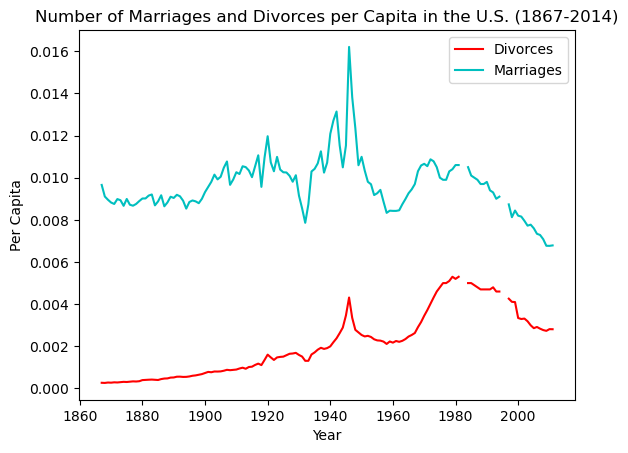

In [14]:
'''
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!
'''

marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage_divorce_data = marriage_divorce_data[(marriage_divorce_data.Year >= 1867) & (marriage_divorce_data.Year <= 2014)]
marriage_divorce_data['Marriages_per_capita'] = marriage_divorce_data.Marriages / marriage_divorce_data.Population
marriage_divorce_data['Divorces_per_capita'] = marriage_divorce_data.Divorces / marriage_divorce_data.Population


plt.plot(marriage_divorce_data.Year, marriage_divorce_data.Divorces_per_capita, label='Divorces', color='r')
plt.plot(marriage_divorce_data.Year, marriage_divorce_data.Marriages_per_capita, label='Marriages', color='c')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()


plt.show()

# ------------------------ Question 7 ------------------------

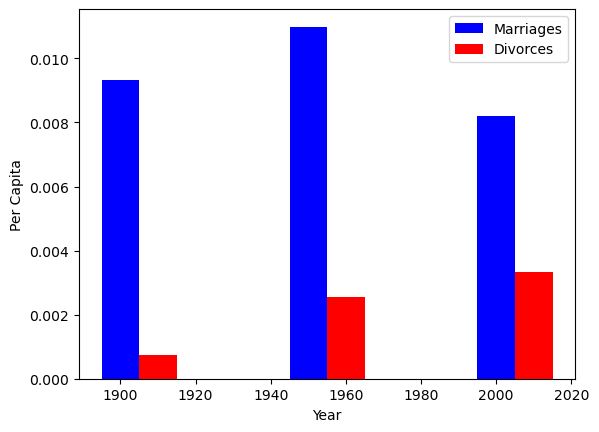

In [21]:
'''
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!
'''

divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
divorce_data = divorce_data[divorce_data.Year.isin([1900, 1950, 2000])]
divorce_data['Marriages_per_capita'] = divorce_data.Marriages / divorce_data.Population
divorce_data['Divorces_per_capita'] = divorce_data.Divorces / divorce_data.Population

bar_width = 10
opacity = 1
marriages = plt.bar(divorce_data.Year, divorce_data.Marriages_per_capita, bar_width,
                    alpha=opacity, color='b', label='Marriages')
divorces = plt.bar(divorce_data.Year + bar_width, divorce_data.Divorces_per_capita, bar_width,
                   alpha=opacity, color='r', label='Divorces')


plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.legend()


plt.show()

# ------------------------ Question 8 ------------------------

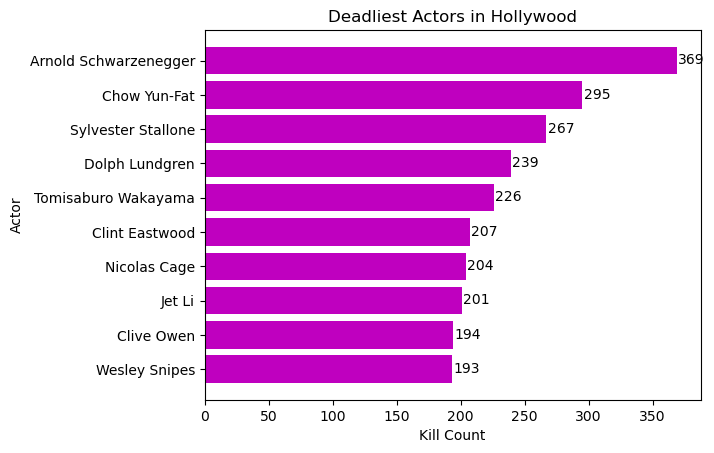

In [26]:
'''
Create a horizontal bar chart that compares the deadliest actors in Hollywood. 
Sort the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!
'''
actors_data = pd.read_csv('actor_kill_counts.csv')
actors_data.sort_values('Count', inplace=True)


plt.barh(actors_data.Actor, actors_data.Count, color='m')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for i, v in enumerate(actors_data.Count):
    plt.text(v + 1, i - 0.1, str(v))


plt.show()

# ------------------------ Question 9 ------------------------

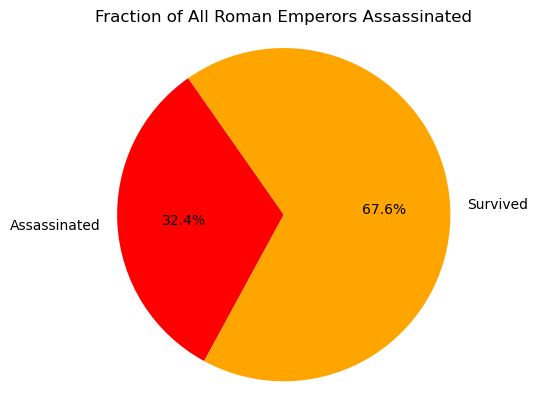

In [38]:
'''
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.
'''
data = pd.read_csv('roman-emperor-reigns.csv')
total_emperors = len(data)
assassinated_emperors = len(data[data['Cause_of_Death'] == 'Assassinated'])
percentage_assassinated = (assassinated_emperors / total_emperors) * 100
percentage_survived = 100 - percentage_assassinated


labels = ['Assassinated', 'Survived']
sizes = [percentage_assassinated, percentage_survived]
colors = ['red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=125)
plt.title('Fraction of All Roman Emperors Assassinated')
plt.axis('equal')


plt.show()

# ------------------------ Question 10 ------------------------

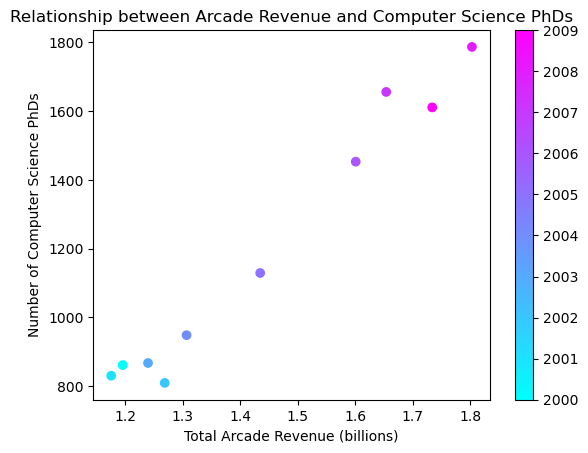

In [42]:
'''
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.
'''
revenue_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.scatter(revenue_data['Total Arcade Revenue (billions)'], revenue_data['Computer Science Doctorates Awarded (US)'], c=revenue_data['Year'], cmap='cool')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Number of Computer Science PhDs')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs')

plt.colorbar()


plt.show()
